## Importing necessary libraries

In [113]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

from sklearn.cluster import KMeans,AgglomerativeClustering

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import silhouette_score, silhouette_samples


## Problem Statement

Based on given data of visitors browsing for online shopping, we are going to build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  We will be analysing and comparing the clusters formed with the existing Revenue Column.

## Dataset Details

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

#### Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. \
The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.\
The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. \
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. \
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 


## Understanding the Dataset

#### Reading the Dataset

In [114]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Check the shape of dataset

In [3]:
print("No of records/observations:",df.shape[0])
print("No of features:",df.shape[1])

No of records/observations: 12330
No of features: 18


#### Check the datatypes

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

As per the description we should have 10 numerical and 8 categorical. But we can see there are 14 numerical, 2 boolean types and only 2 of object type. Therefore we need to map certain variables to appropriate datatypes. Example: Operating System, Browser columns have to be changed to categoric type 

In [115]:
df['OperatingSystems']  = df['OperatingSystems'].astype(object)
df['Browser']  = df['Browser'].astype(object)
df['Region']  = df['Region'].astype(object)
df['TrafficType']  = df['TrafficType'].astype(object)
df['Weekend'] = df['Weekend'].astype(object)
df['Revenue'] = df['Revenue'].astype(object)

#### checking data types after conversion

In [6]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
Revenue                     object
dtype: object

#### Summary statistics

In [7]:
#For numerical data:
df.describe(include = np.number)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


There seems to be no missing values as observed form the count of numerical variables. However, we can see that the standard deviation is higher than mean for all of the variables indicating the high variation between the values and abnormal distribution of the data - strong positive skewness

In [8]:
#For categoric variables:
df.describe(include = np.object)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


Again we can see no missing values observed from the count. We have the data collected for 10 months of a year of which May month has the most frequent records and mostly the visitor type is 'Returning visitor' and we have most number of users from Region 1. \
The data also shows revenue is not mostly generated and most browsing activities surprisingly happens during weekdays more than the weekends which is something unexpected.

#### Distribution of variables

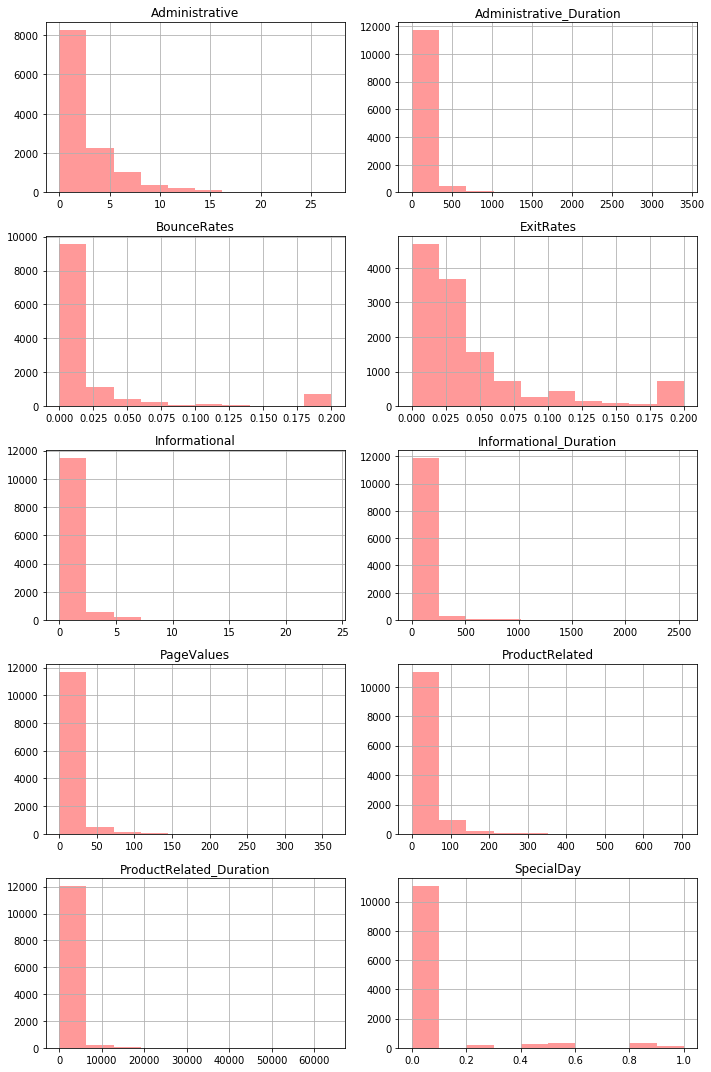

Skewness:
 Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64


In [70]:
df.hist(layout=(5,2),figsize=(10,15),color='red',alpha=0.4)
plt.tight_layout()
plt.show()
print("Skewness:\n",df.skew())


We can observe the strong positive skewness in the numerical variables - Administration, Administrative_Duration,Informational_Duration, ProductRelated_Duration. As understood form the summary statistics the above plot confirms the abnormal distribution of numerical data

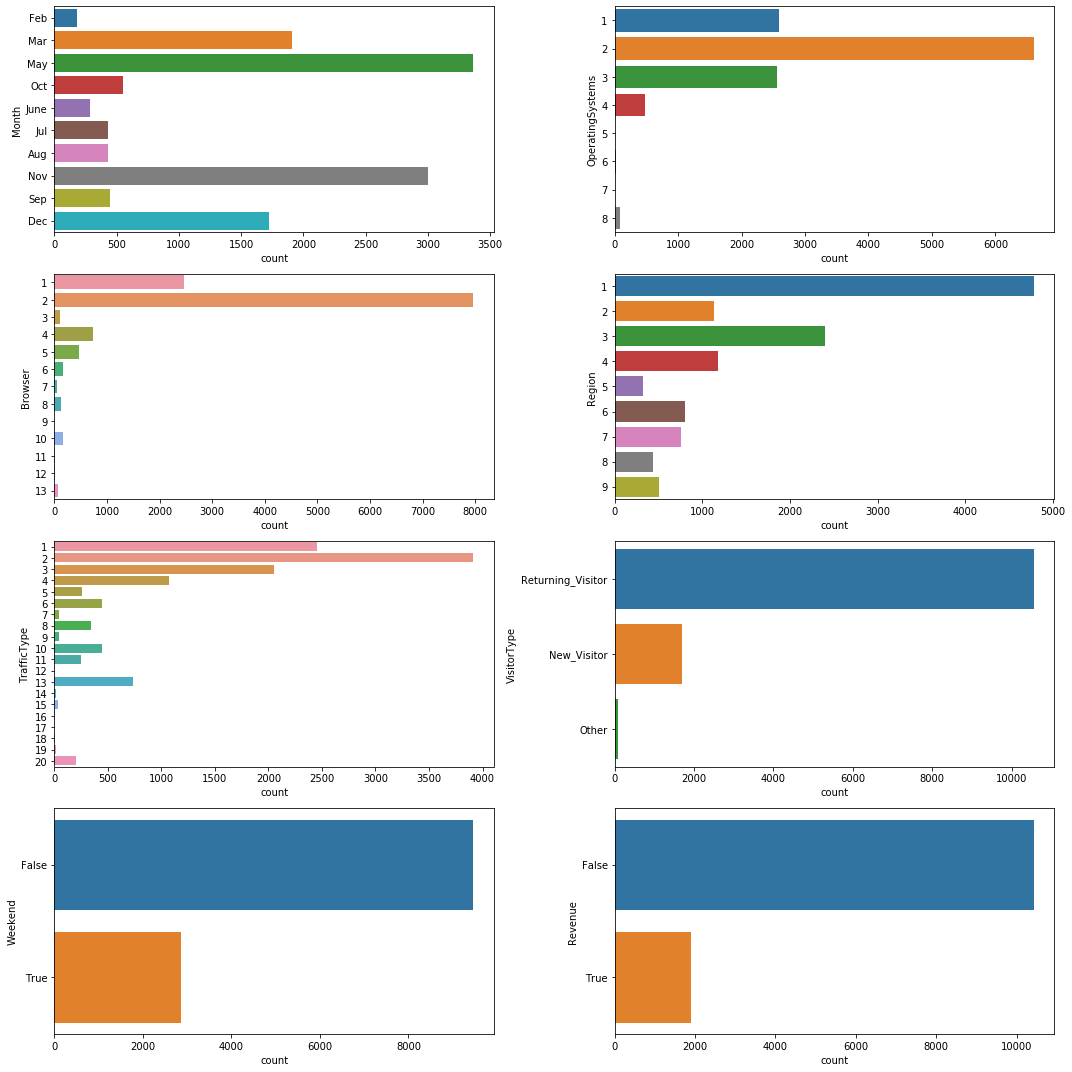

In [10]:
#Categoric variables:
fig,ax = plt.subplots(4,2,figsize=(15,15))
df_cat = df.select_dtypes(include=np.object)
for var, subplot in zip(df_cat,ax.flatten()):
    countplot = sns.countplot(y=df[var],ax=subplot)
    countplot.set_ylabel(var,fontsize=10)
plt.tight_layout()
plt.show()

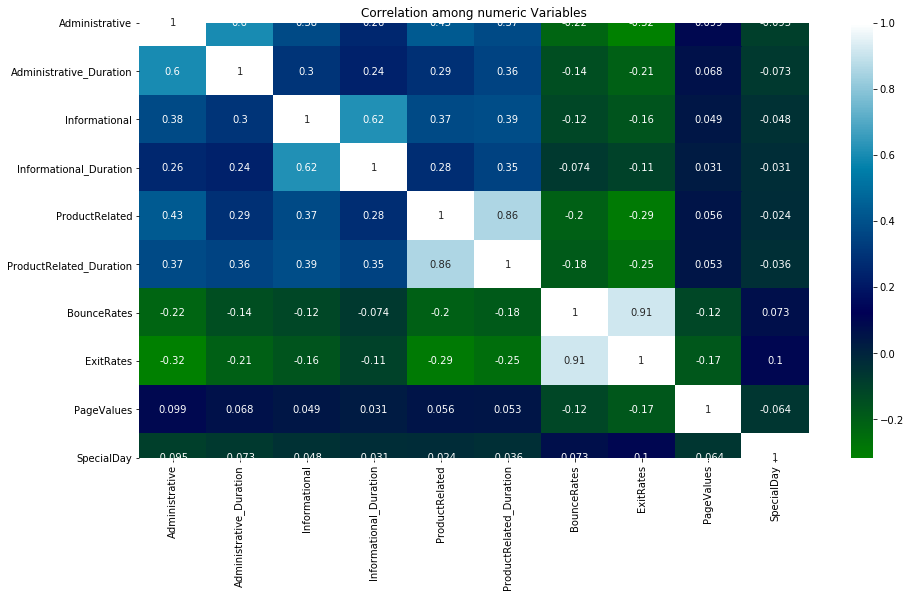

In [56]:
#Correlation check:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='ocean')
plt.title("Correlation among numeric Variables")
plt.show()

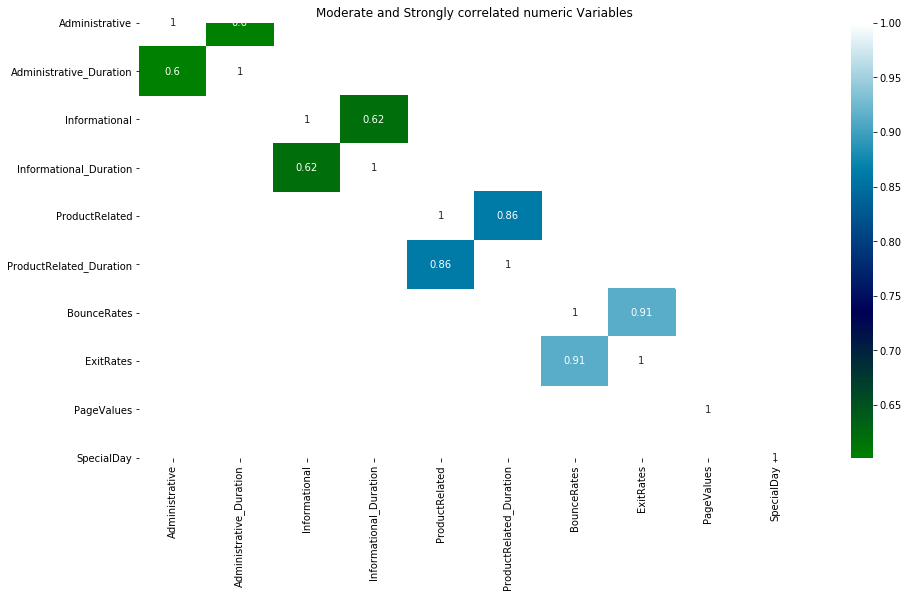

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()[np.abs(df.corr()>0.5)],annot=True,cmap='ocean')
plt.title("Moderate and Strongly correlated numeric Variables")
plt.show()

We can observe a strong correlation between 'ProductRelated_Duration' & 'ProductRelated' and 'BounceRates' & 'ExitRates'.
Moderate correlation exists between 'Administrative' & ' Administrative_Duration'. This correlation may introduce collinearity issue while building models

## Data cleaning

#### checking for null values

In [11]:
n = pd.DataFrame(df.isnull().sum(),columns=['Null_count'])
n['Percent'] = (n['Null_count']/len(df))*100
n = n.sort_values(['Percent'],ascending = False)
n                

,Null_count,Percent
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0


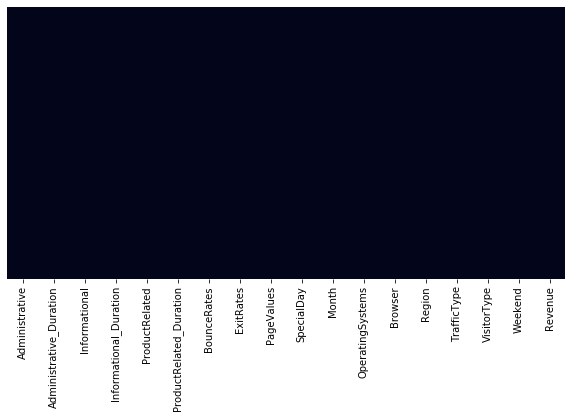

In [12]:
#Visualizing:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),annot=False,cbar=False,yticklabels=False)
plt.show()

We see there are no missing values that needs to be concerned of

#### Checking the Outliers

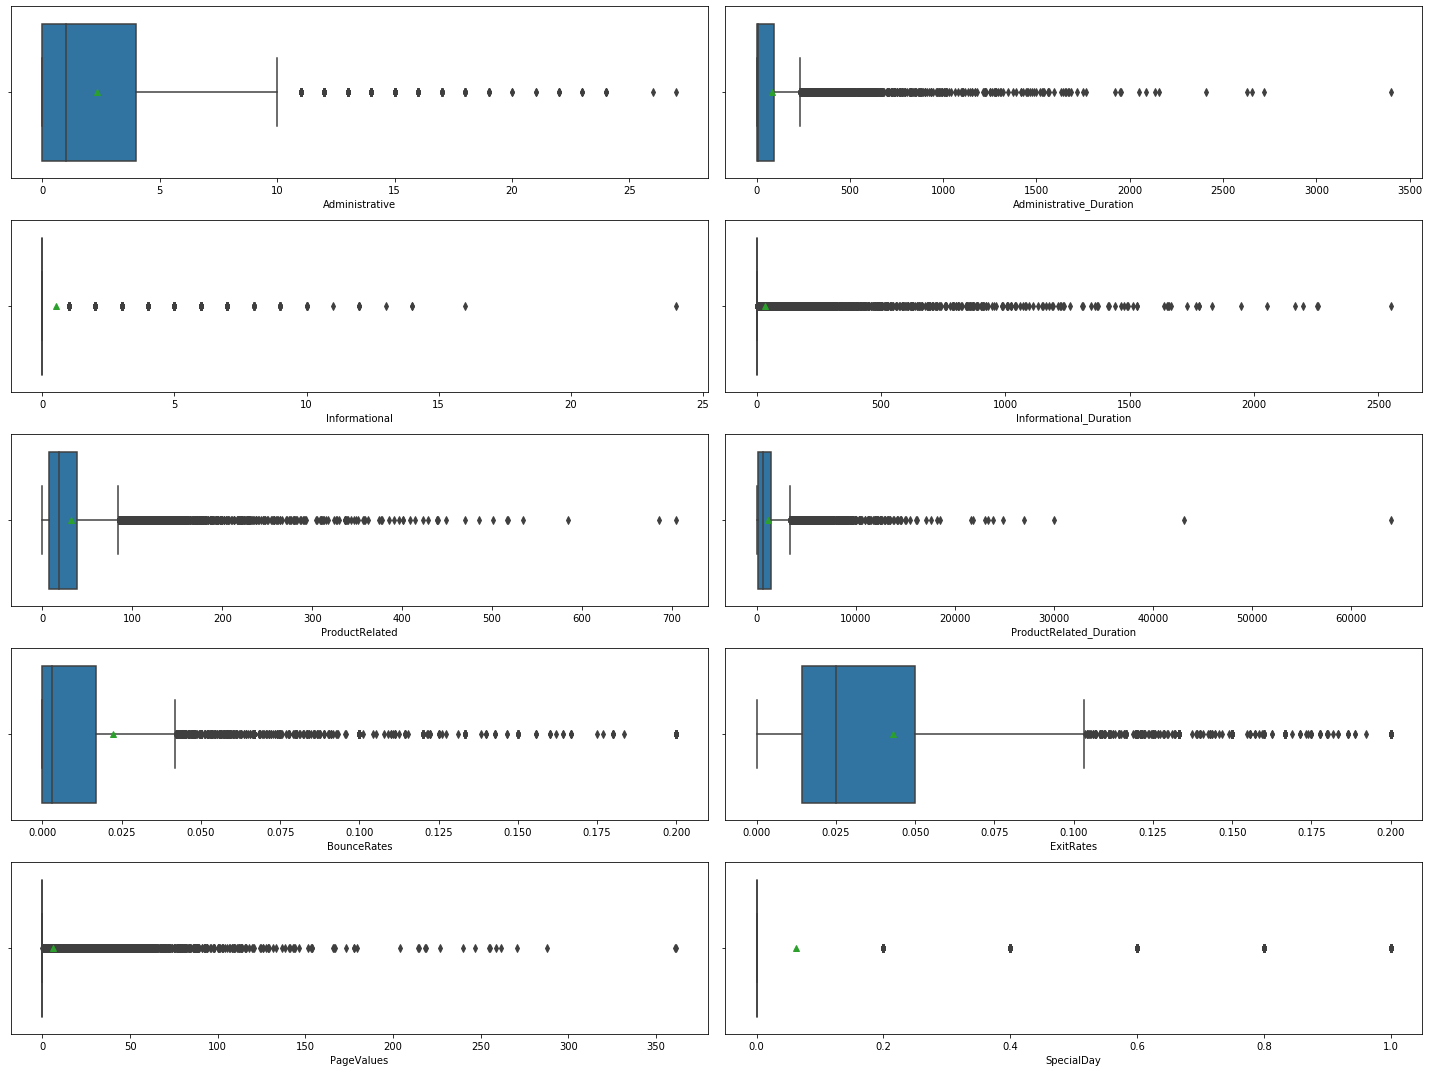

In [24]:
#Visualizing:
fig,ax = plt.subplots(5,2,figsize=(20,15))
df_num = df.select_dtypes(include=np.number)
for var, subplot in zip(df_num,ax.flatten()):
    countplot = sns.boxplot(x=df[var],ax=subplot,showmeans=True)
    countplot.set_xlabel(var,fontsize=10)
plt.tight_layout()
plt.show()

#### Removing Outliers using IQR method

In [116]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df1 = df[~((df<(Q1-(1.5*IQR)))|(df>(Q3+(1.5*IQR)))).any(axis=1)].reset_index(drop=True)
df1.shape

(5258, 18)

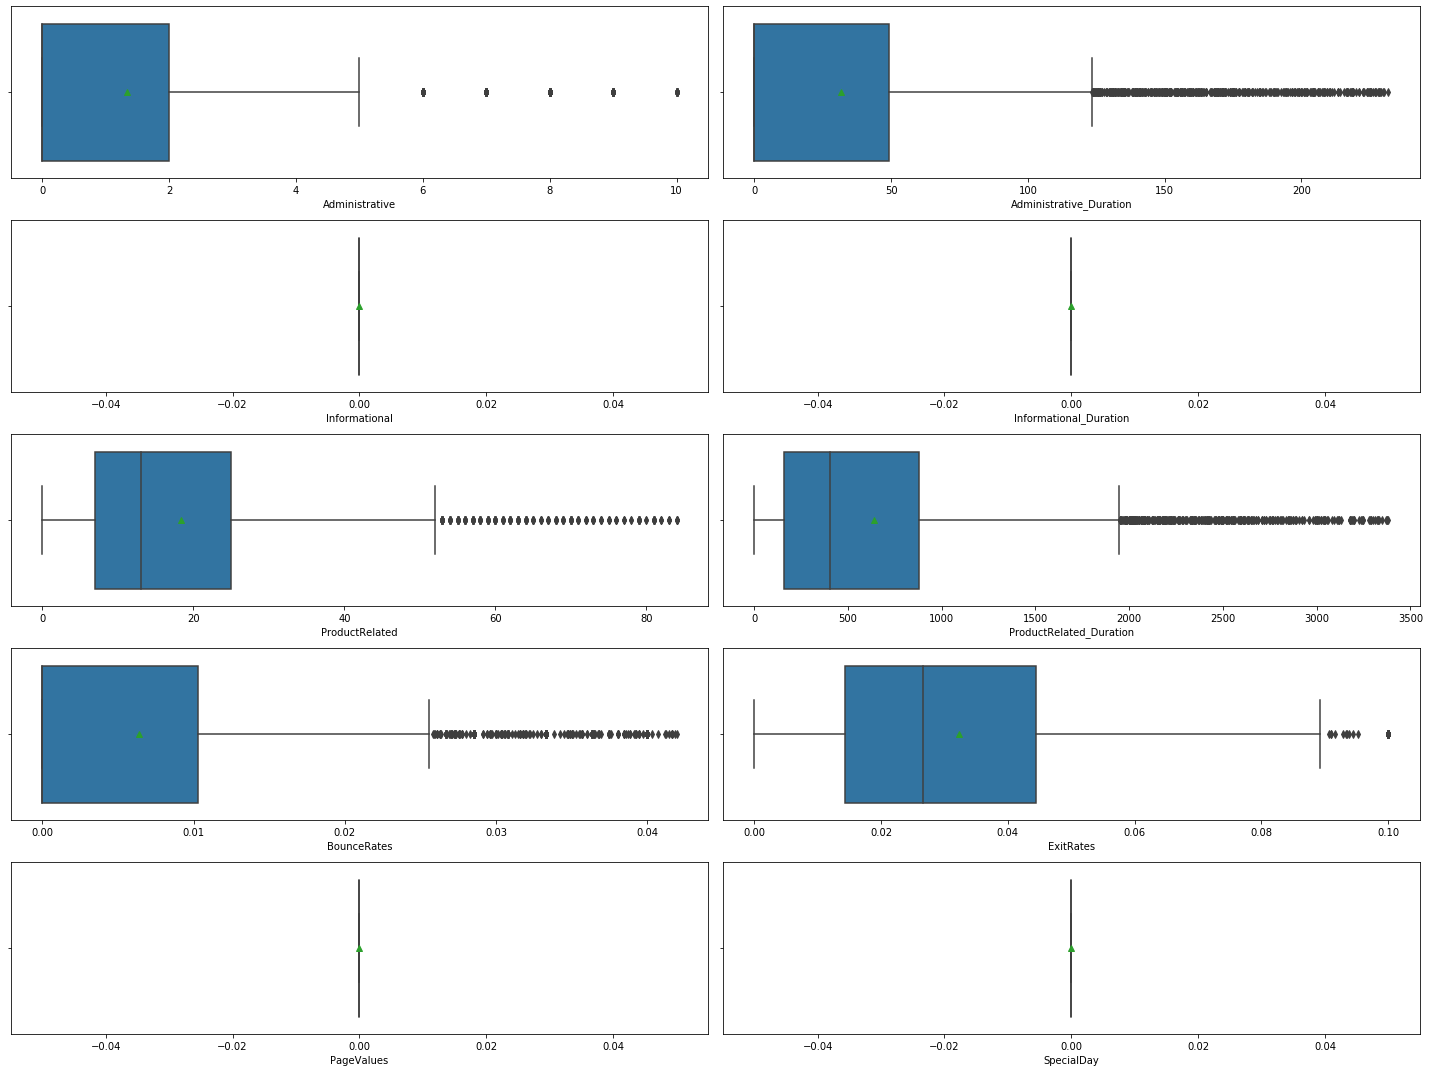

In [5]:
#After outlier treatment - Visualizing:
fig,ax = plt.subplots(5,2,figsize=(20,15))
df_num = df1.select_dtypes(include=np.number)
for var, subplot in zip(df_num,ax.flatten()):
    countplot = sns.boxplot(x=df1[var],ax=subplot,showmeans=True)
    countplot.set_xlabel(var,fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
df1.var()[df1.var() == 0]

Informational             0.0
Informational_Duration    0.0
PageValues                0.0
SpecialDay                0.0
dtype: float64

After outlier treatment we observe that the variance of the above 4 variables has become 0 implying we can remove those variables for further analysis.

In [117]:
df1.drop(['Informational','Informational_Duration','PageValues','SpecialDay'],axis=1,inplace=True)

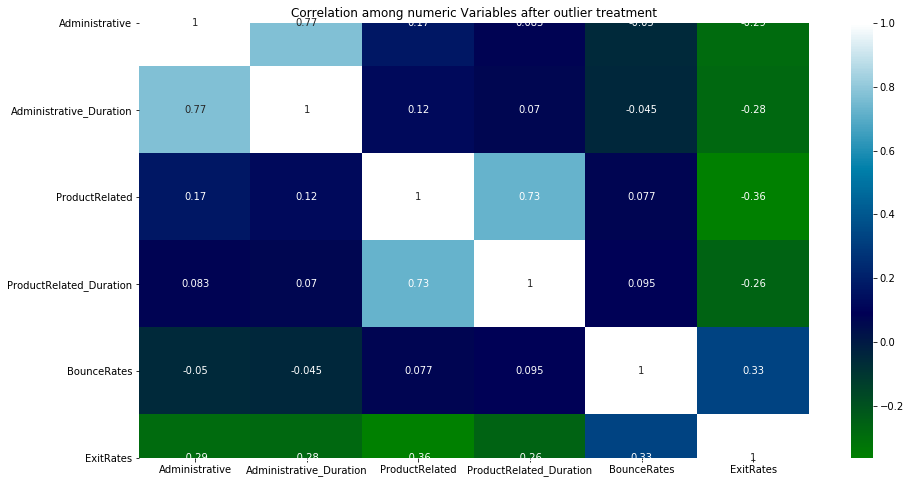

In [8]:
#Correlation check: After outlier treatment
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap='ocean')
plt.title("Correlation among numeric Variables after outlier treatment")
plt.show()

After outlier treatment we observe few changes in the correlation among the variables.\
Slightly strong correlation exists between Administrative & Administrative_Duration \
Strong correlation between ProductRelated and ProductRelated_Duration still persists although it has decreased a bit.\
The Strong correlation between BounceRates and ExitRates has reduced drastically

### Normalising the data

In [118]:
mm = MinMaxScaler()
df_num = df1.select_dtypes(include=np.number)
df_num1 = pd.DataFrame(mm.fit_transform(df_num),columns=df_num.columns)
df_num1.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,0.0,0.0,0.023810,0.018923,0.000000,1.000000
1,0.0,0.0,0.119048,0.185537,0.476812,0.500000
2,0.0,0.0,0.226190,0.045598,0.376430,0.245614
3,0.0,0.0,0.035714,0.116792,0.000000,0.666667
4,0.0,0.0,0.083333,0.082937,0.000000,0.285714


### Encoding the categorical variables

In [119]:
df_cat = df1.select_dtypes(include = np.object)
df_cat.columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [120]:
df_cat1 = pd.get_dummies(df_cat,drop_first=True,prefix=df_cat.columns)
df_cat1.head()

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
df2 = pd.concat([df_num1,df_cat1],axis=1)
df2.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month_Dec,Month_Feb,Month_Jul,Month_June,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0.0,0.0,0.023810,0.018923,0.000000,1.000000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.119048,0.185537,0.476812,0.500000,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,0.226190,0.045598,0.376430,0.245614,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.035714,0.116792,0.000000,0.666667,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.083333,0.082937,0.000000,0.285714,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

We will perform Kmeans clustering on variables - ProductRelated_Duration, ProductRelated

In [99]:
X_filtered = df2[['ProductRelated','ProductRelated_Duration']]

In [100]:
n_clusters = [2, 3, 4, 5, 6]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X_filtered)
    score = silhouette_score(X_filtered, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.6121436796785497)
For 3 clusters the silhouette score is 0.5157930628870971)
For 4 clusters the silhouette score is 0.49807041572196853)
For 5 clusters the silhouette score is 0.47081905909340416)
For 6 clusters the silhouette score is 0.45608613814970206)


In [101]:
new_clusters = KMeans(n_clusters = 2, random_state = 10)
new_clusters.fit(X_filtered)

df1['Cluster'] = new_clusters.labels_

In [17]:
df1.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,2,64.000000,0.000000,0.100000,Feb,2,2,1,2,Returning_Visitor,False,False,0
1,0,0.0,10,627.500000,0.020000,0.050000,Feb,3,3,1,4,Returning_Visitor,True,False,0
2,0,0.0,19,154.216667,0.015789,0.024561,Feb,2,2,1,3,Returning_Visitor,False,False,0
3,0,0.0,3,395.000000,0.000000,0.066667,Feb,1,1,3,3,Returning_Visitor,False,False,0
4,0,0.0,7,280.500000,0.000000,0.028571,Feb,1,1,1,3,Returning_Visitor,False,False,0


In [131]:
#check the shape of data:
df1.Cluster.value_counts()

1    4082
0    1176
Name: Cluster, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


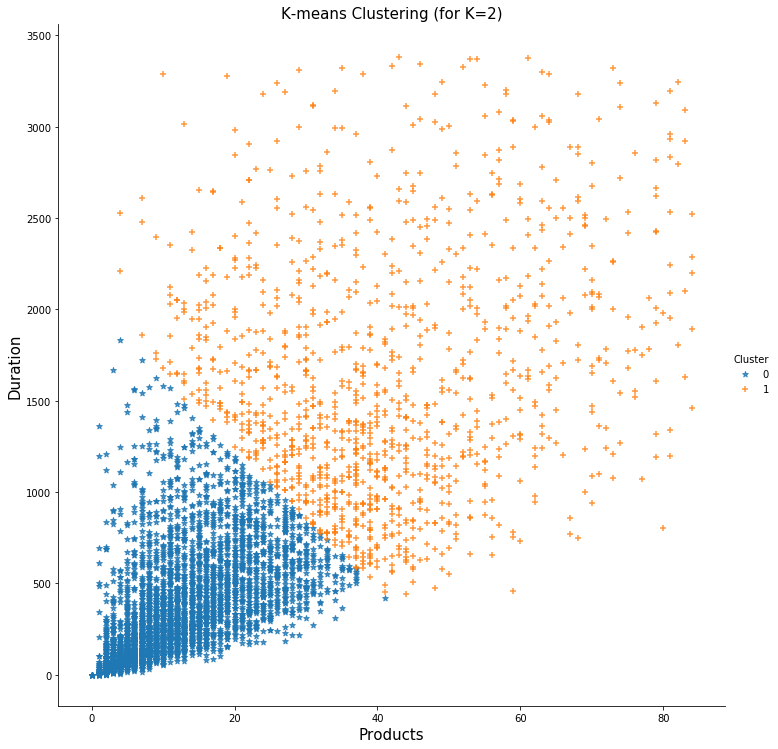

In [28]:
sns.lmplot(x = 'ProductRelated', y = 'ProductRelated_Duration', data = df1, hue = 'Cluster', markers = ['*', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=2)', fontsize = 15)
plt.xlabel('Products', fontsize = 15)
plt.ylabel('Duration', fontsize = 15)

# display the plot
plt.show()

In [ ]:
#Analysis of Cluster 1

In [23]:
df1.drop('Revenue',axis=1)[df1['Cluster']==0].describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Cluster
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.0
mean,1.227095,29.409507,11.747673,356.421149,0.006006,0.035044,0.0
std,1.927660,49.966731,7.899238,298.577800,0.010638,0.024825,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,5.000000,120.125000,0.000000,0.016000,0.0
50%,0.000000,0.000000,10.000000,273.604167,0.000000,0.028889,0.0
75%,2.000000,45.000000,17.000000,527.114583,0.009524,0.050000,0.0
max,10.000000,231.750000,41.000000,1833.000000,0.041667,0.100000,0.0


In [24]:
df1.drop('Revenue',axis=1)[df1['Cluster']==0].describe(include = np.object)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,4082,4082,4082,4082,4082,4082,4082
unique,10,8,12,9,19,3,2
top,Mar,2,2,1,2,Returning_Visitor,False
freq,913,2084,2504,1556,1266,3231,3099


In [21]:
#Analysis of Clsuter 2

In [25]:
df1.drop('Revenue',axis=1)[df1['Cluster']==1].describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Cluster
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0
mean,1.718537,39.274958,41.276361,1610.085860,0.007788,0.022999,1.0
std,2.247615,55.043615,16.505968,663.493531,0.009474,0.015577,0.0
min,0.000000,0.000000,4.000000,441.791667,0.000000,0.000000,1.0
25%,0.000000,0.000000,30.000000,1097.006705,0.000000,0.011111,1.0
50%,1.000000,6.000000,39.000000,1475.694048,0.004840,0.019595,1.0
75%,3.000000,64.687500,51.000000,2032.303785,0.011919,0.031262,1.0
max,10.000000,230.100000,84.000000,3382.083333,0.041945,0.093478,1.0


In [26]:
df1.drop('Revenue',axis=1)[df1['Cluster']==1].describe(include = np.object)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,1176,1176,1176,1176,1176,1176,1176
unique,10,5,10,9,14,3,2
top,Nov,2,2,1,2,Returning_Visitor,False
freq,397,684,794,456,383,1045,891


The mean exit rate of users in Cluster 0 is 0.035 and bounce rate is 0.006 while the Cluster 1 has lower exit rate 0.022.
Also we can see that Cluster 1 users spend more time in browsing the different types of Product. Since nearly double the times of products have been browsed by Cluster 1 users. We can say these users are more inclined towards Products

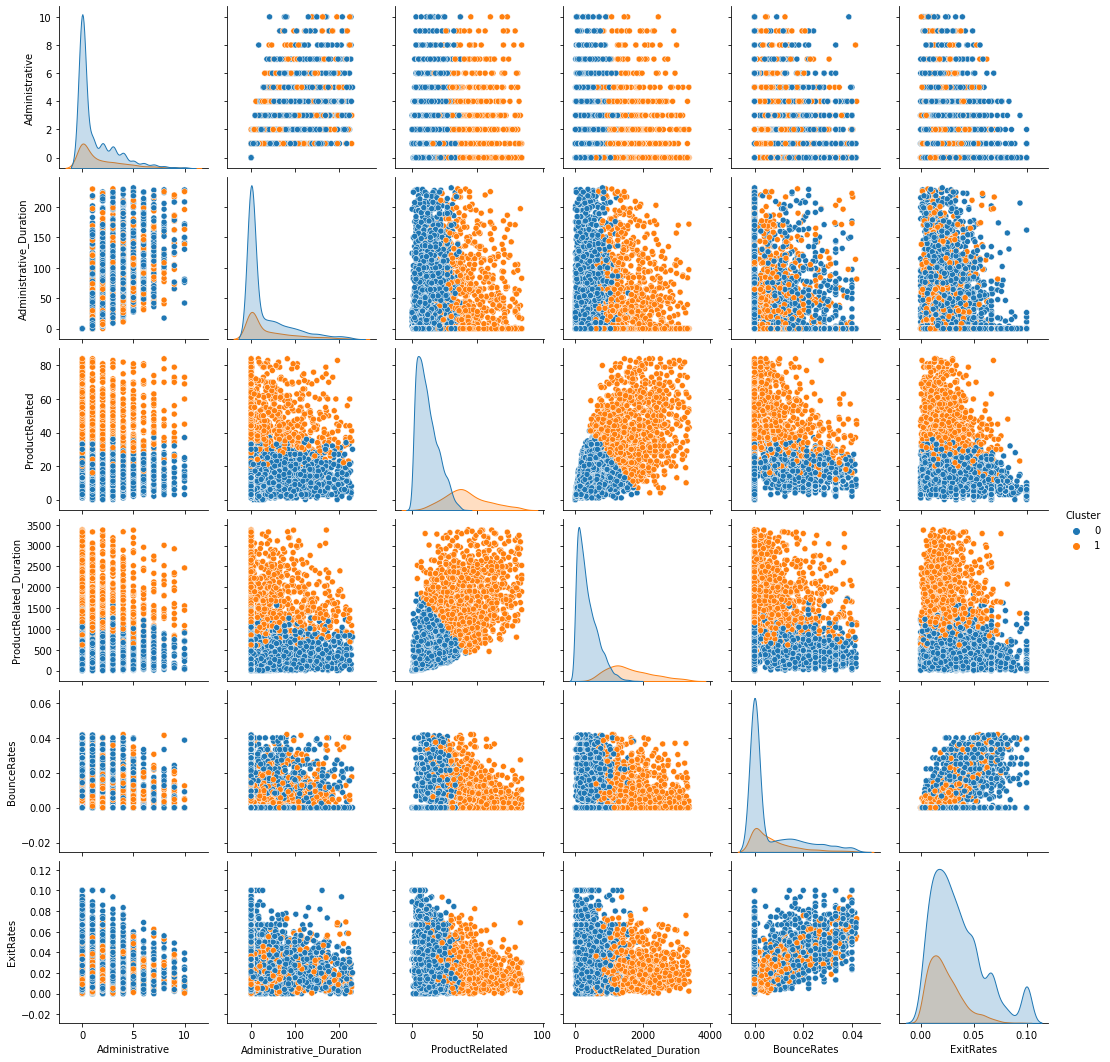

In [40]:
sns.pairplot(df1.select_dtypes(include=np.number),hue='Cluster')
plt.show()

### Applying PCA

In [123]:
#To find no of principal components:
df3 = df2[['Administrative', 'Administrative_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates']]
cov_mat = np.cov(df3.T)
eig_val,eig_vec = eig(cov_mat)
print("Eigen values:\n",eig_val)
print("Eigen vec:\n",eig_vec)

Eigen values:
 [0.10338046 0.00911999 0.0107875  0.0273571  0.06250496 0.06932401]
Eigen vec:
 [[-0.44941918 -0.51611828  0.54657907 -0.12718377  0.45986502  0.07241607]
 [-0.49116745  0.43383631 -0.49635998 -0.13049074  0.54986579  0.06918915]
 [-0.31890807  0.55884473  0.48792986 -0.22228267 -0.38665606  0.386008  ]
 [-0.2666856  -0.47699685 -0.4600232  -0.37653171 -0.41876372  0.41544227]
 [ 0.26070169 -0.0268872  -0.01728917  0.47579157  0.2505822   0.80115151]
 [ 0.56212809  0.06965362  0.06987335 -0.74110264  0.31387     0.16288211]]


In [124]:
eig_val = list(eig_val)
eig_val.sort(reverse=True)
#Percentage variation:
percent_var=[]
for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)
cum_exp_var = np.cumsum(percent_var)
cum_exp_var

array([ 36.5982164 ,  61.13994606,  83.26763128,  92.95245215,
        96.77138646, 100.        ])

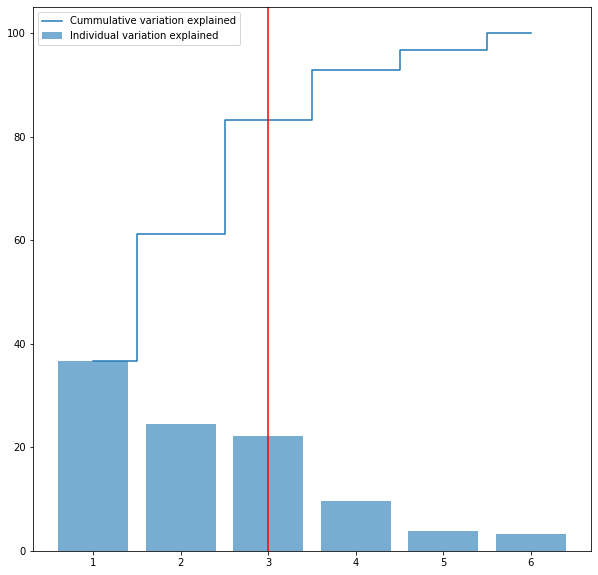

In [126]:
plt.figure(figsize=(10,10))
plt.bar(range(1,7),percent_var,alpha=0.6,align='center',label = 'Individual variation explained')
plt.step(range(1,7),cum_exp_var,where='mid',label = 'Cummulative variation explained')
plt.axvline(x=3,color='red')
plt.legend(loc='best')
plt.show()

75% variation in the data is given by 16 Principal components. Therefore the original data of dimensions 63 has been reduced to 16

In [127]:
pca = PCA(n_components=3,random_state=10)
component = pca.fit_transform(df3)
df_pca = pd.DataFrame(component,columns = ['PC1','PC2','PC3'])
df_pca.head()

,PC1,PC2,PC3
0,-0.574815,-0.176765,0.183766
1,-0.343251,0.229773,0.039716
2,-0.177234,0.091139,-0.048109
3,-0.357542,-0.185805,0.033556
4,-0.137240,-0.243539,-0.090249


### Applying KMeans clustering on the PCA dimensions

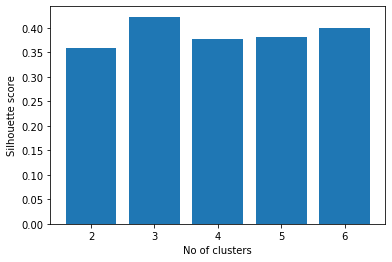

In [140]:
#To find optimal number of clusters:
X = df_pca[['PC1','PC2']]
score = []
n = [2,3,4,5,6]
for i in n:
    kmeans = KMeans(n_clusters=i,random_state=10)
    predict = kmeans.fit_predict(X)
    score.append(silhouette_score(X,predict))
plt.bar(range(2,7),score)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

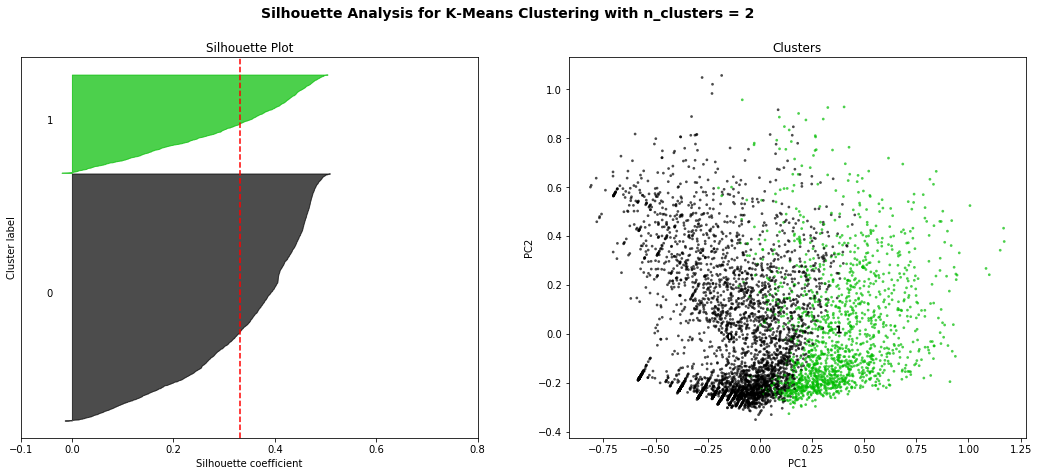

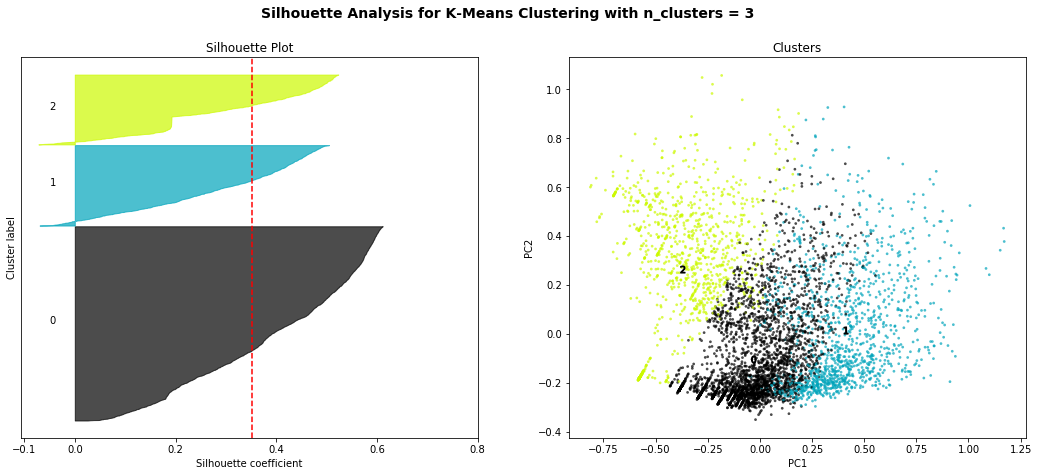

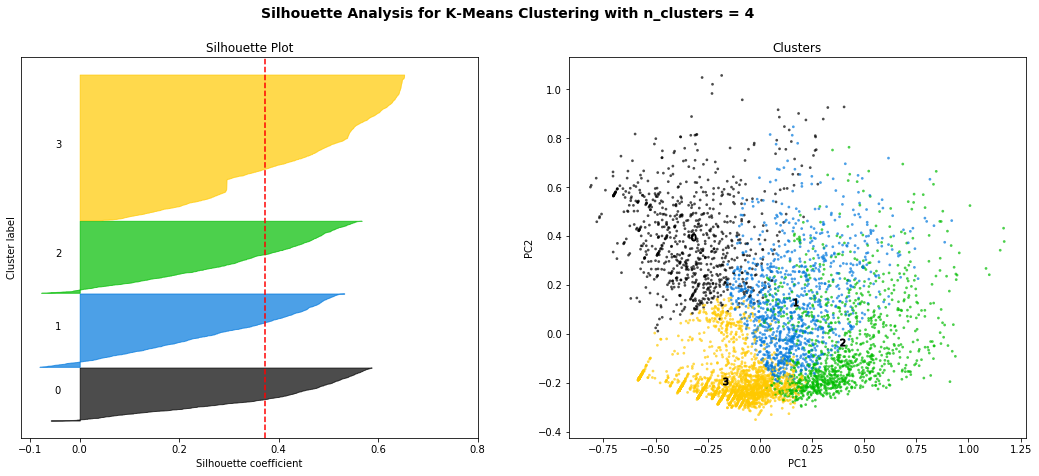

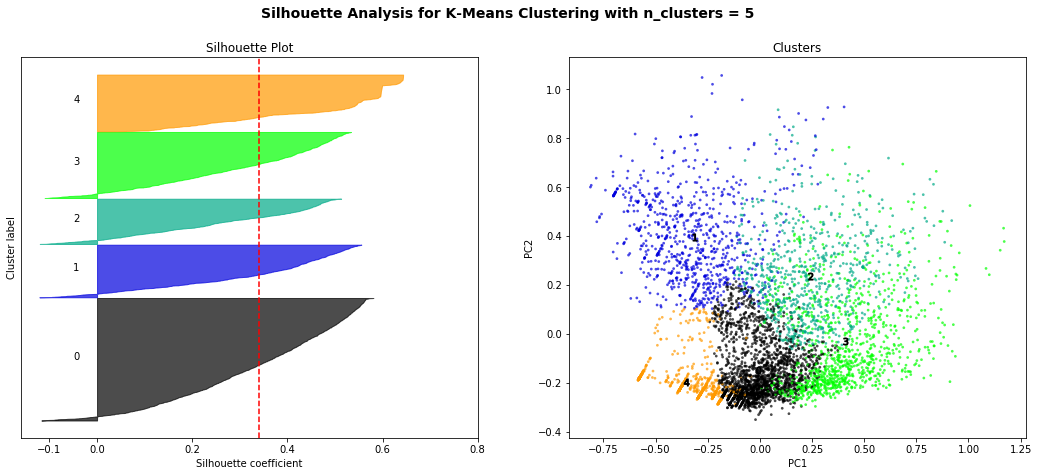

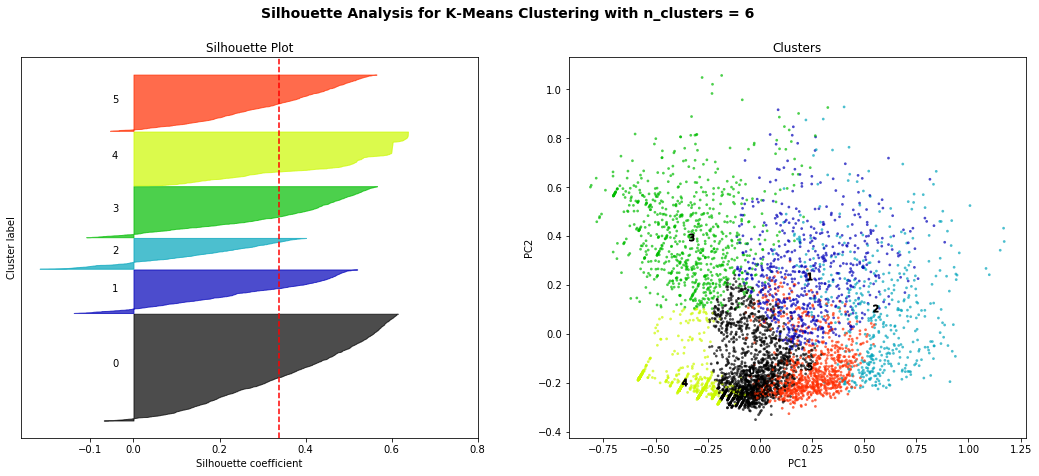

In [129]:
import matplotlib.cm as cm
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X = np.array(df_pca.iloc[:,:3])

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

If we consider K = 3 as the optimal number of cluster as the silhouette score is maximum but there are outliers visible. Therefore we choose k=2 as the optimal number of clusters as the outliers is minimum at the same time individual silhouette coefficient is greater than the average value

### Building Kmeans model with n_clusters = 2

In [130]:
model_1 = KMeans(n_clusters=2,random_state=10)
model_1 = model_1.fit(X)
df1['Cluster_pca'] = model_1.labels_
df1.head()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster_pca
0,0,0.0,2,64.000000,0.000000,0.100000,Feb,2,2,1,2,Returning_Visitor,False,False,0
1,0,0.0,10,627.500000,0.020000,0.050000,Feb,3,3,1,4,Returning_Visitor,True,False,0
2,0,0.0,19,154.216667,0.015789,0.024561,Feb,2,2,1,3,Returning_Visitor,False,False,0
3,0,0.0,3,395.000000,0.000000,0.066667,Feb,1,1,3,3,Returning_Visitor,False,False,0
4,0,0.0,7,280.500000,0.000000,0.028571,Feb,1,1,1,3,Returning_Visitor,False,False,0


In [131]:
#check the shape of data:
df1.Cluster_pca.value_counts()

0    3762
1    1496
Name: Cluster_pca, dtype: int64

In [133]:
#Analysis of Cluster 1:
df1.drop(['Revenue','Cluster'],axis=1)[df1['Cluster_pca']==0].describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Cluster_pca
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.0
mean,0.335194,5.278127,16.207868,581.777861,0.007179,0.037692,0.0
std,0.731471,13.606357,14.707387,637.216609,0.011123,0.024613,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,6.000000,136.500000,0.000000,0.019231,0.0
50%,0.000000,0.000000,11.000000,347.000000,0.000000,0.033333,0.0
75%,0.000000,0.000000,22.000000,803.928145,0.012500,0.050000,0.0
max,4.000000,162.200000,84.000000,3382.083333,0.041844,0.100000,0.0


In [135]:
df1.drop(['Revenue','Cluster'],axis=1)[df1['Cluster_pca']==0].describe(include=np.object)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,3762,3762,3762,3762,3762,3762,3762
unique,10,8,12,9,19,3,2
top,Nov,2,2,1,2,Returning_Visitor,False
freq,984,2029,2353,1481,1060,3264,2874


In [136]:
#Analysis of cluster 2:
df1.drop(['Revenue','Cluster'],axis=1)[df1['Cluster_pca']==1].describe()

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Cluster_pca
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.0
mean,3.856283,97.848025,23.743984,775.216435,0.004457,0.018917,1.0
std,2.009692,51.527839,18.224078,707.719097,0.008055,0.013612,0.0
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.000000,57.900000,10.000000,251.758333,0.000000,0.008798,1.0
50%,3.000000,88.600000,19.000000,544.391667,0.000000,0.015949,1.0
75%,5.000000,130.643750,32.000000,1091.591389,0.006159,0.025920,1.0
max,10.000000,231.750000,84.000000,3374.916667,0.041945,0.093750,1.0


In [137]:
df1.drop(['Revenue','Cluster'],axis=1)[df1['Cluster_pca']==1].describe(include=np.object)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,1496,1496,1496,1496,1496,1496,1496
unique,10,7,12,9,18,3,2
top,Nov,2,2,1,2,Returning_Visitor,False
freq,317,739,945,531,589,1012,1116


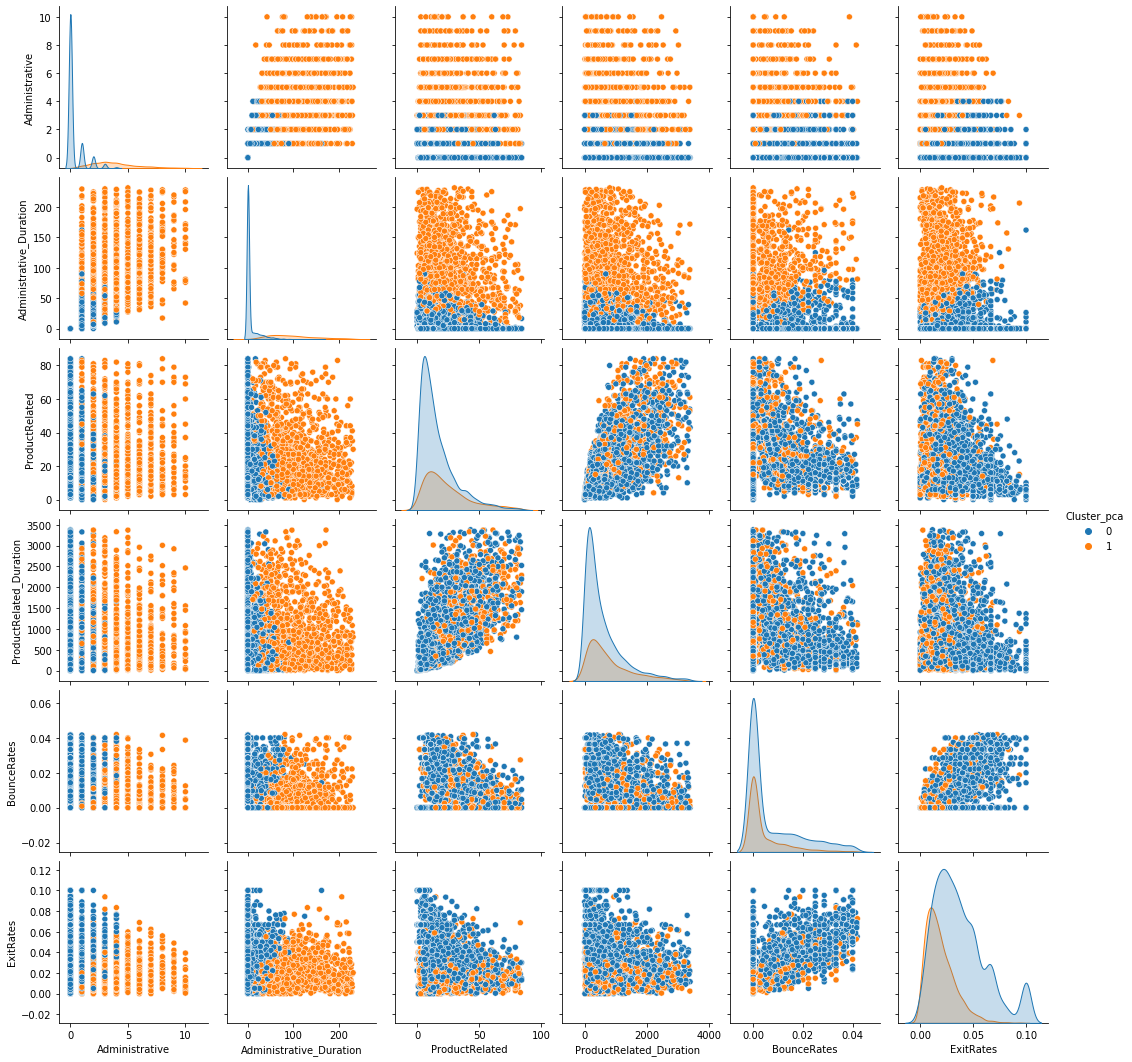

In [138]:
sns.pairplot(df1.select_dtypes(include=np.number),hue='Cluster_pca')
plt.show()

We can see that PCA has not helped much in clustering. Therefore we will consider the 2 clusters initially formed before employing PCA where the Cluster 1 users are searching more of Products and having less exit rates compared to Cluster 0